In [65]:
# Import system and OS modules to manage Python paths and file locations
import sys
import os

# Get the project root (two folders above the current working directory)
root = os.path.abspath(os.path.join(os.getcwd(), "../../")) 

# Add the project root to Python's search path if not already there
if root not in sys.path: 
    sys.path.insert(0, root)

# Now import everything from pybootnet.py inside the libs folder
from libs.pybootnet import *


In [66]:
# Load the ARG and MAG feature tables
featuretable1 = pd.read_csv("../../Data/Dataset1/ARG_rclr_dataset1_with_column_names.csv")
featuretable2 = pd.read_csv("../../Data/Dataset1/MAG_rclr_dataset1_with_column_names.csv")

In [67]:
# Clean SampleID column to merge correctly
for df in [featuretable1, featuretable2]:
    df['SampleID'] = df['SampleID'].str.strip()
    
# Merging two feature tables
def merge_diff_networks(featuretable1, featuretable2):
    # First extracting the column names from each feature table, excluding SampleID
    featuretable1_columns_names = []
    for col in featuretable1.columns:
        if col != 'SampleID':
            featuretable1_columns_names.append(col)
            #print("Dataset1 features:", featuretable1_columns_names)

    featuretable2_columns_names = []
    for col in featuretable2.columns:
        if col != 'SampleID':
            featuretable2_columns_names.append(col)
            #print("Dataset2 features:", featuretable2_columns_names)

    # Next, merging the two feature tables using SampleID as the joining column
    merged_data = pd.merge(featuretable1, featuretable2, on='SampleID', how='inner')
    merged_data["Category"] = "TJ_River"
    cols = merged_data.columns.tolist()
    cols = ["SampleID", "Category"] + [c for c in merged_data.columns if c not in ["SampleID", "Category"]]
    merged_data = merged_data[cols]
    

    return featuretable1_columns_names, featuretable2_columns_names, merged_data

In [68]:
# Call the merge function
dataset1_feature_names, dataset2_feature_names, merged_data = merge_diff_networks(featuretable1,featuretable2)


In [69]:
# Save merged dataset
merged_data.to_csv(
    "../../Output/Dataset1/merged_ARGs_CDS_and_MAG_featuretable.tsv",
    sep="\t",
    index=False
)

In [70]:
# Read the merged_ARG_and_MAG_featuretables.tsv file
merged_data = pd.read_csv('../../Output/Dataset1/merged_ARGs_CDS_and_MAG_featuretable.tsv', sep="\t")
merged_data


,SampleID,Category,rphB,OXA-237,OXY-3-1,EreA,cmlv,rphA,FosM1,lin,...,Enterobacteriaceae (F) 255,JAGPKJ01 sp018053995 (S) 222,Lachnospira (G) 266,OLB19 (G) 263,Lachnospira (G) 264,Pseudomonadota (P) 271,Paludibacter (G) 238,CAJJDF01 (G) 250,Sulfurovum (G) 265,Pseudohongiellaceae (F) 269
0,ERR11181229,TJ_River,-2.887455,-1.911768,-1.911768,1.584740,-2.887455,-2.887455,-2.887455,-2.887455,...,-2.303635,0.116040,-0.339582,-2.303635,-0.363364,-2.303635,-0.821403,-2.303635,-1.195538,-2.303635
1,ERR11181230,TJ_River,-2.887455,0.455762,-2.887455,0.168079,-2.887455,-2.887455,-2.887455,-2.887455,...,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,0.354116,-2.303635,-2.303635,-2.303635,-2.303635
2,ERR11181231,TJ_River,-2.887455,-1.390083,-2.887455,1.135646,-2.887455,-2.887455,-2.887455,-2.887455,...,-2.303635,-1.563484,-1.202193,-0.804233,-1.044972,-2.303635,-1.230107,-2.303635,-0.945930,-2.303635
3,ERR11181232,TJ_River,-2.887455,-2.887455,-2.887455,0.843475,-2.887455,-2.887455,-2.887455,-2.887455,...,-0.974454,0.406955,-0.837989,-1.457890,-0.367925,-2.303635,-1.483275,-2.303635,-1.418343,-2.303635
4,ERR11181233,TJ_River,-2.887455,-2.887455,-2.158470,1.275517,-2.887455,-2.887455,-2.887455,-2.887455,...,-1.317415,-1.429176,-2.303635,-0.991788,-1.333535,-2.303635,-1.333454,-2.303635,-0.878157,-2.303635
5,ERR11181234,TJ_River,-2.887455,0.749582,-1.924567,0.749582,-2.887455,-2.887455,-2.887455,-2.887455,...,-0.208975,-2.303635,-1.620737,-1.452603,-1.158430,-2.303635,-2.303635,-2.303635,-1.678697,-2.303635
6,ERR11181235,TJ_River,-2.887455,0.048613,-2.887455,1.090067,-2.887455,-2.887455,-2.887455,-2.887455,...,-1.081708,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635
7,ERR11181236,TJ_River,-2.887455,0.034963,-2.887455,0.975946,-2.887455,-2.887455,-2.887455,-2.887455,...,0.485380,-1.627542,-2.303635,-1.393089,-1.776379,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635
8,ERR11181237,TJ_River,-2.887455,-0.398736,-2.478177,0.294412,-2.887455,-2.887455,-2.887455,-2.887455,...,-0.251660,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635,-2.303635
9,ERR11181238,TJ_River,-2.887455,-2.887455,-2.887455,1.091403,-2.887455,-2.887455,-2.887455,-2.887455,...,-2.303635,-2.303635,-1.060125,-1.056831,-2.303635,-2.303635,-0.547605,-2.303635,-1.024693,0.988944


In [71]:
#Create bootstrap replicates of the merged data
create_bootstrap = bootstrap_replicates(merged_data, 500) # Creates # of bootstrap replicates

In [72]:
# After merging the feature tables, create a correlation matrix with the merged table
# Only interested in correlations between features from different tables, not within the same table
# Set any correlations between features within the same table equal to 0
# The return matrix should only contain values between features from different tables, while the remaining should be 0

def different_network_correlation_matrix(data_list, dataset1_feature_names, dataset2_feature_names):
    matrix_list = []

    for data in data_list:
        correlations = data.corr(method='spearman', numeric_only=True)

        # Set within dataset1 correlations to 0
        correlations.loc[dataset1_feature_names, dataset1_feature_names] = 0

        # Set within dataset2 correlations to 0
        correlations.loc[dataset2_feature_names, dataset2_feature_names] = 0

        # Keeping only dataset1/dataset2 correlations
        correlations.loc[dataset1_feature_names, dataset2_feature_names]

        matrix_list.append(correlations)

    return matrix_list


In [73]:
# Call the correlation function
matrix_list = different_network_correlation_matrix(
    create_bootstrap,
    dataset1_feature_names,
    dataset2_feature_names
)

In [74]:
# Save correlation matrices
matrix_list[0].to_csv(
    "../../Output/Dataset1/correlation_matrix_ARGs_and_MAGs_dataset1.tsv",
    sep="\t"
) 

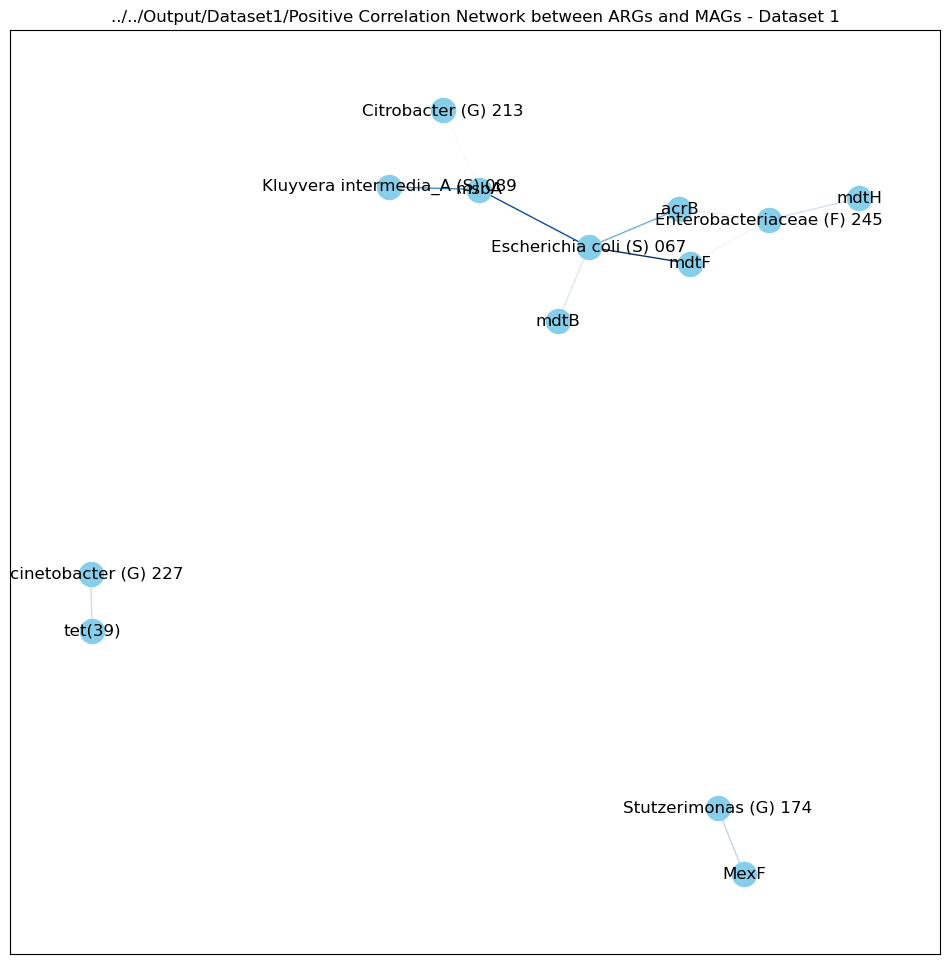

In [75]:
# build only positive correlations
G=build_positive_network(matrix_list, 0.9, title="../../Output/Dataset1/Positive Correlation Network between ARGs and MAGs - Dataset 1")


In [76]:
TJ_River_stat = calculate_network_statistics(matrix_list, 0.89)

In [77]:
project_stats = {
    'TJ_River' : TJ_River_stat
}

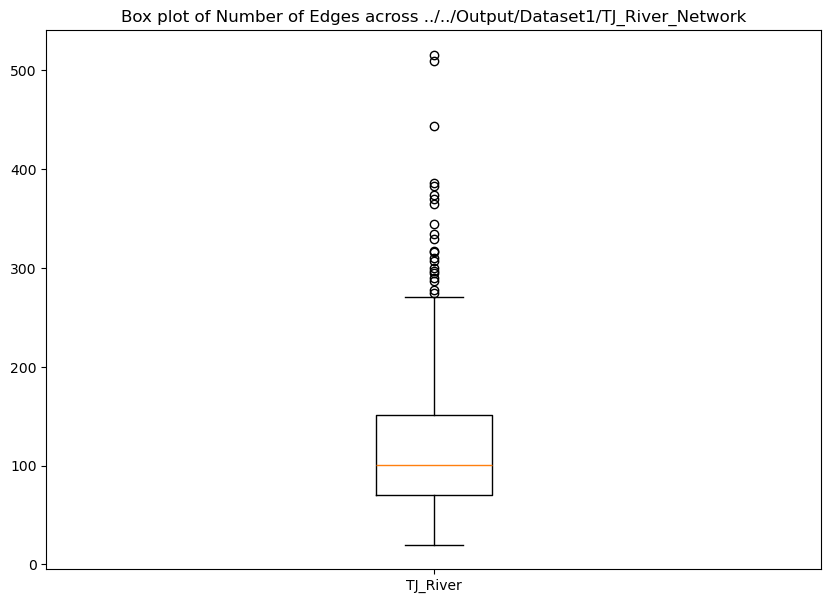

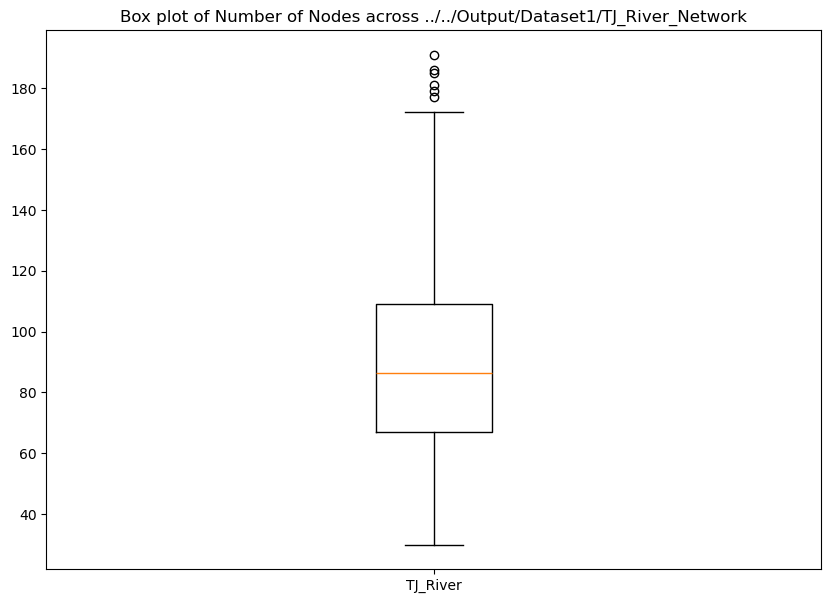

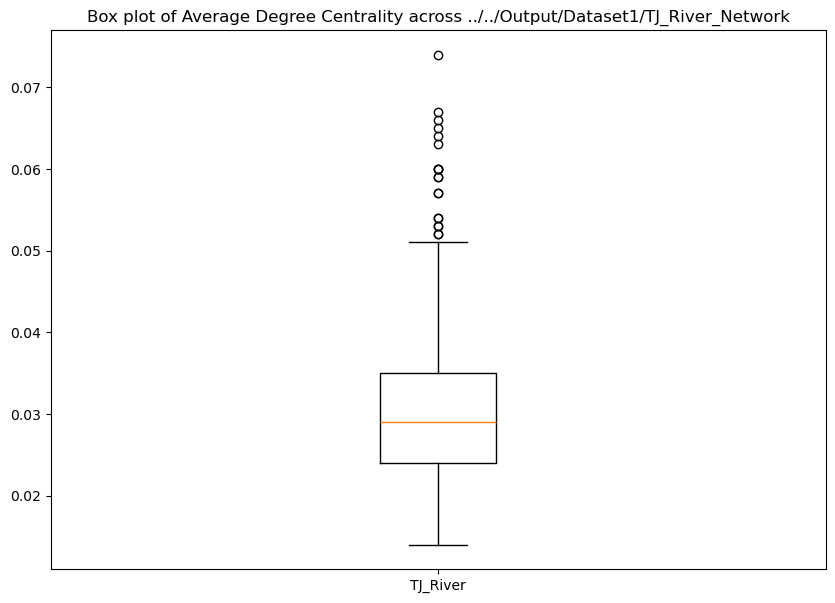

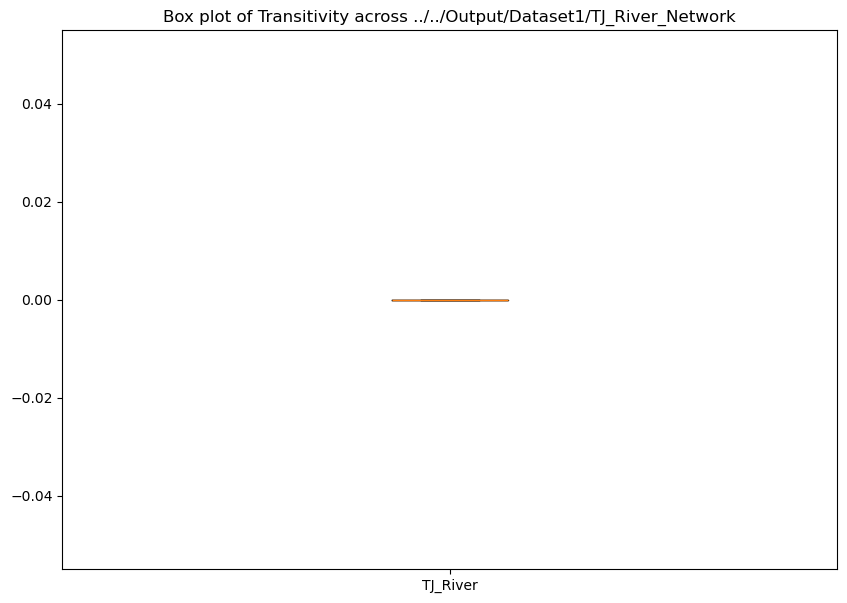

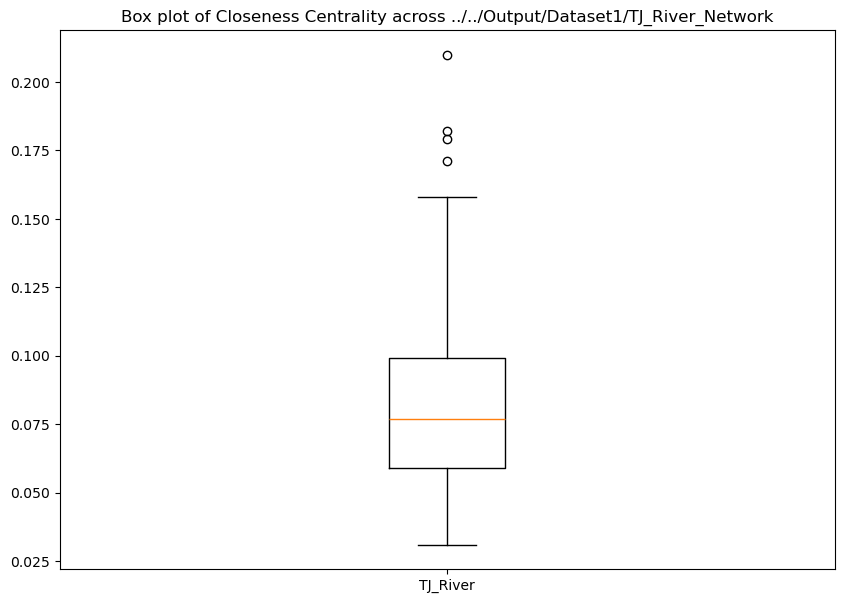

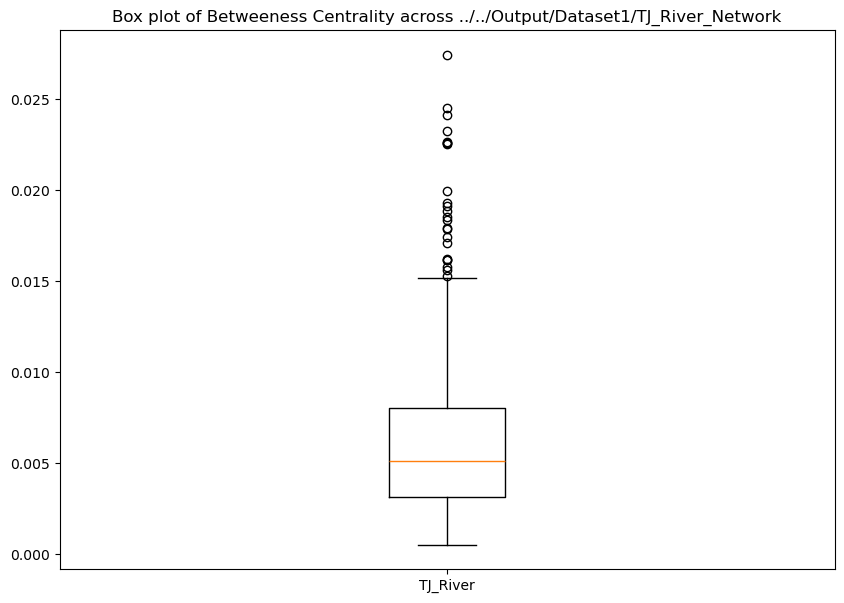

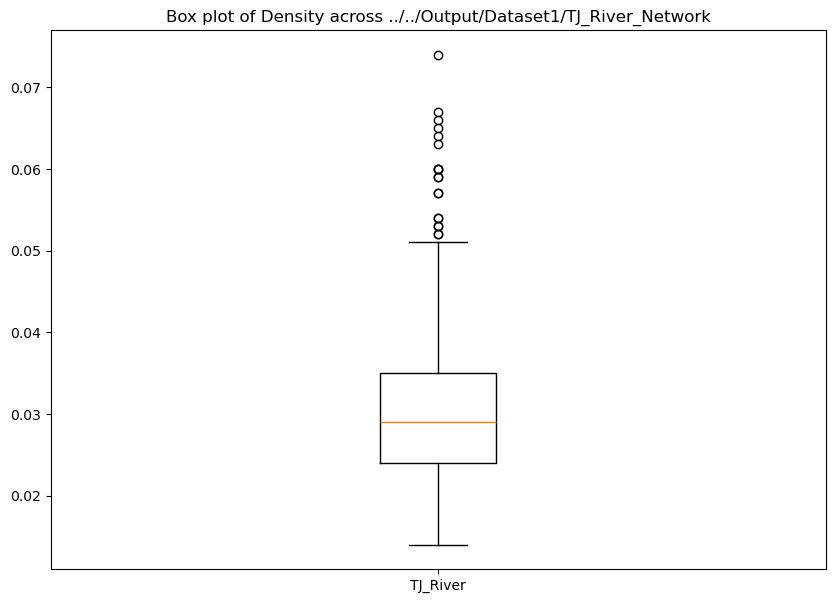

,TJ_River_mean,TJ_River_std
Number of Edges,119.346,72.798
Number of Nodes,89.190,30.924
Average Degree Centrality,0.031,0.010
Transitivity,0.000,0.000
Closeness Centrality,0.082,0.029
Betweeness Centrality,0.006,0.004
Density,0.031,0.010


In [78]:
analyze_network_statistics(project_stats, filename='../../Output/Dataset1/TJ_River_Dataset1_stats.csv', project_name='../../Output/Dataset1/TJ_River_Network')